# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Confirm loading by printing the shapes
print("MNIST dataset loaded successfully.")
print(f"Shape of feature data (X): {X.shape}")  # Should be (70000, 784)
print(f"Shape of labels (y): {y.shape}")        # Should be (70000,)

# Normalize the data
X = X / 255.0
print("Data normalization complete.")

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and testing data split complete.")
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


Loading MNIST dataset...
MNIST dataset loaded successfully.
Shape of feature data (X): (70000, 784)
Shape of labels (y): (70000,)
Data normalization complete.
Training and testing data split complete.
Training set shape: (56000, 784), Testing set shape: (14000, 784)


## Part 2: Implement SVD for Dimensionality Reduction

In [8]:
def apply_svd_custom(X_train, X_test, n_components):
    covariance_matrix = np.dot(X_train.T, X_train)
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, V = np.linalg.eigh(covariance_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    V = V[:, idx]

    # Keep only the top n_components singular vectors
    V_reduced = V[:, :n_components]

    # Project the data onto the reduced singular vectors
    X_train_reduced = np.dot(X_train, V_reduced)
    X_test_reduced = np.dot(X_test, V_reduced)

    # Normalize the reduced data
    norms = np.linalg.norm(X_train_reduced, axis=0)
    norms[norms == 0] = 1
    X_train_reduced /= norms
    X_test_reduced /= norms

    # Return reduced data and the entire V matrix for visualization
    return X_train_reduced, X_test_reduced, V

## Part 3: Train Logistic Regression and Measure Performance

In [9]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [10]:
svd_components = [784, 300, 100, 50, 20, 10]  # Adjust these values to experiment with different levels of reduction

# Store the results
results = []
singular_vectors_list = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, top_singular_vectors = apply_svd_custom(X_train, X_test, n_components)
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append((n_components, accuracy, training_time))
    singular_vectors_list.append(top_singular_vectors)
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")



Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...
SVD components: 784, Accuracy: 0.8261, Training time: 68.5516 seconds
Applying custom SVD with 300 components...
SVD components: 300, Accuracy: 0.8274, Training time: 9.3233 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.8226, Training time: 3.2263 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.8114, Training time: 1.6463 seconds
Applying custom SVD with 20 components...
SVD components: 20, Accuracy: 0.7561, Training time: 0.7667 seconds
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.6384, Training time: 0.5413 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


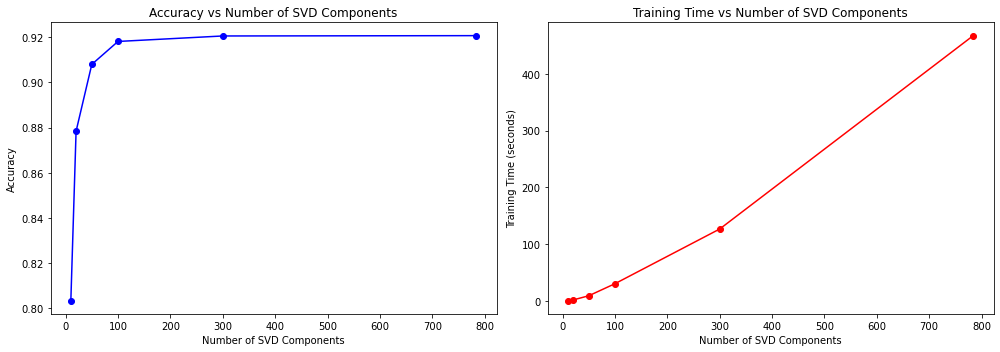

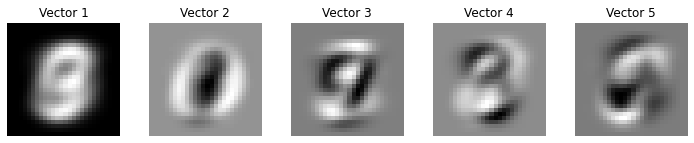

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot accuracy and training time
def plot_accuracy_and_training_time(results_df):
    plt.figure(figsize=(14, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(results_df['SVD Components'], results_df['Accuracy'], marker='o', color='b')
    plt.title("Accuracy vs Number of SVD Components")
    plt.xlabel("Number of SVD Components")
    plt.ylabel("Accuracy")

    # Plot Training Time
    plt.subplot(1, 2, 2)
    plt.plot(results_df['SVD Components'], results_df['Training Time'], marker='o', color='r')
    plt.title("Training Time vs Number of SVD Components")
    plt.xlabel("Number of SVD Components")
    plt.ylabel("Training Time (seconds)")

    plt.tight_layout()
    plt.show()

# Function to visualize the top 5 singular vectors
def visualize_top_singular_vectors(singular_vectors_list):
    # Visualize the top 5 singular vectors from the first SVD application
    top_5_singular_vectors = singular_vectors_list[0][:, :5]  # Take top 5 vectors from the first SVD
    plt.figure(figsize=(10, 2))

    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(top_5_singular_vectors[:, i].reshape(28, 28), cmap='gray')
        plt.title(f"Vector {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Assuming results_df and singular_vectors_list are populated
plot_accuracy_and_training_time(results_df)
visualize_top_singular_vectors(singular_vectors_list)

## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

In [ ]:
The results of applying SVD to the MNIST dataset shows a trade-off between dimensionality reduction, 
model accuracy, and training time. Based on the graphs, we see that as the number of SVD componenets increase,
the accuracy plateaus to around .92 or 92%. As the number of SVD components increases from 10 to 100, the training
time goes up drastically too with a significant jump after 100 components, illustrating the computational 
cost of using more features.This is also because we know that the more SVD components,captures more variance in the
dataset. In the context of image data like MNIST, the first few singular vectors capture the most important, 
high-level features of the images, while later components capture finer details and noise.This demonstrates that 
around 100 components is an optimal balance, offering high accuracy while keeping training times manageable. The
visualization of the top 5 singular vectors, reshaped into 28x28 images, provides insight into the patterns
that the model relies on to differentiate between digits, with the first vector highlighting general digit shapes
and subsequent vectors capturing specific details. Vector 1 captures the general shape of the digits, 
showing a smooth and broad pattern like the digit “9” or “0”. Vector 2 highlights sharper details related to digit 
outlines, specifically emphasizing the “0” shape, while Vector 3, 4, 5 show some sharper details of the number like 
3 or 9